<a href="https://colab.research.google.com/github/maheshmahajan133/M6/blob/main/Titanic_Dataset_AUTOVIIZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Description: this program will predict if a passenger will survive on the titanic


```
# This is formatted as code
```



In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install Autoviz

Shape of your Data Set loaded: (891, 12)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    12 Predictors classified...
        2 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 3

**********************************************************************
  Resource punkt not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt')
  
  Searched in:
    - '/root/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/usr/nltk_data'
    - '/usr/lib/nltk_data'
    - ''
**********************************************************************

Could not draw wordcloud plot for Ticket

**********************************************************************
  Resource punkt not found.
  Please use the NLTK Downloader to obtain the resource:

  >

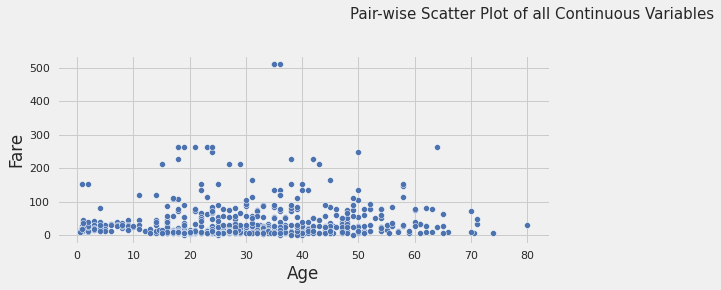

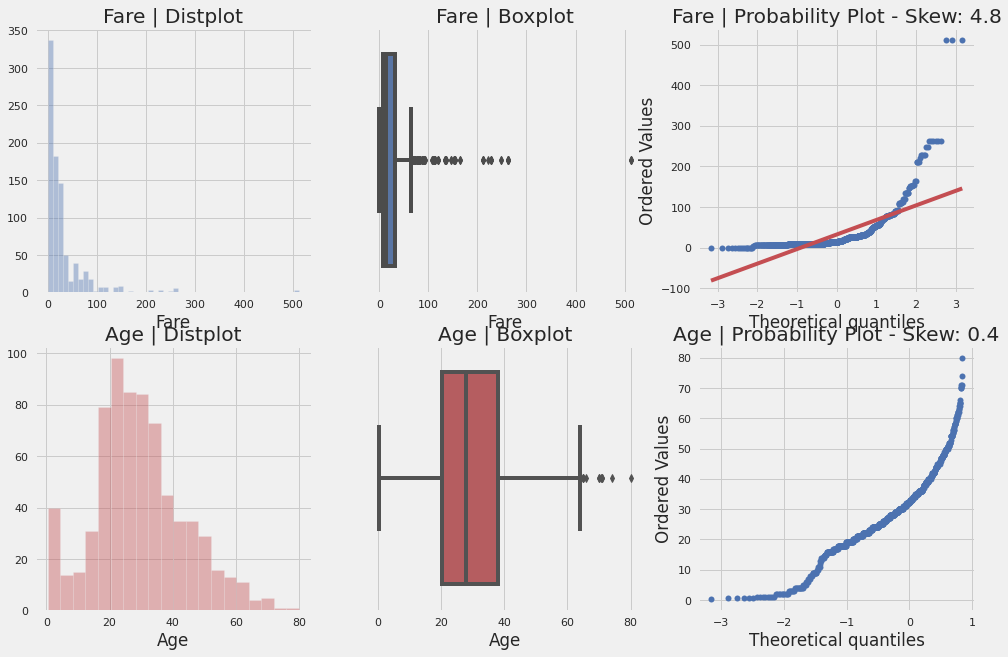

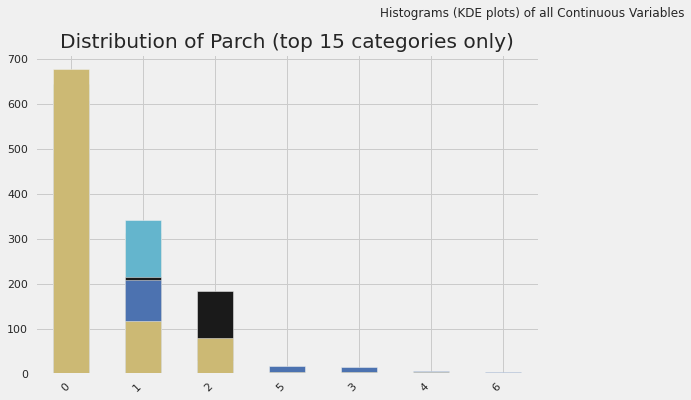

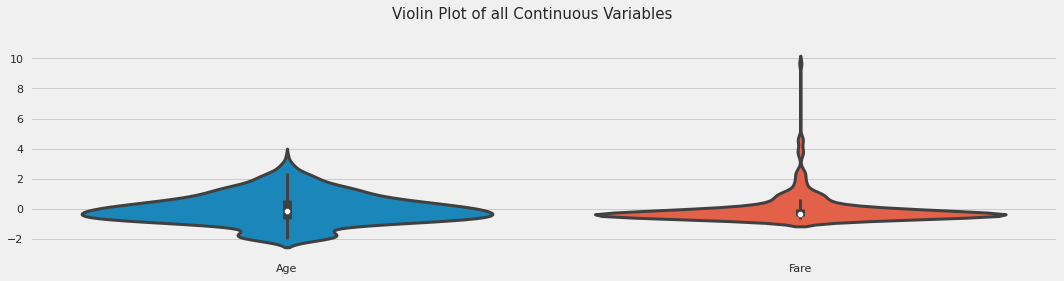

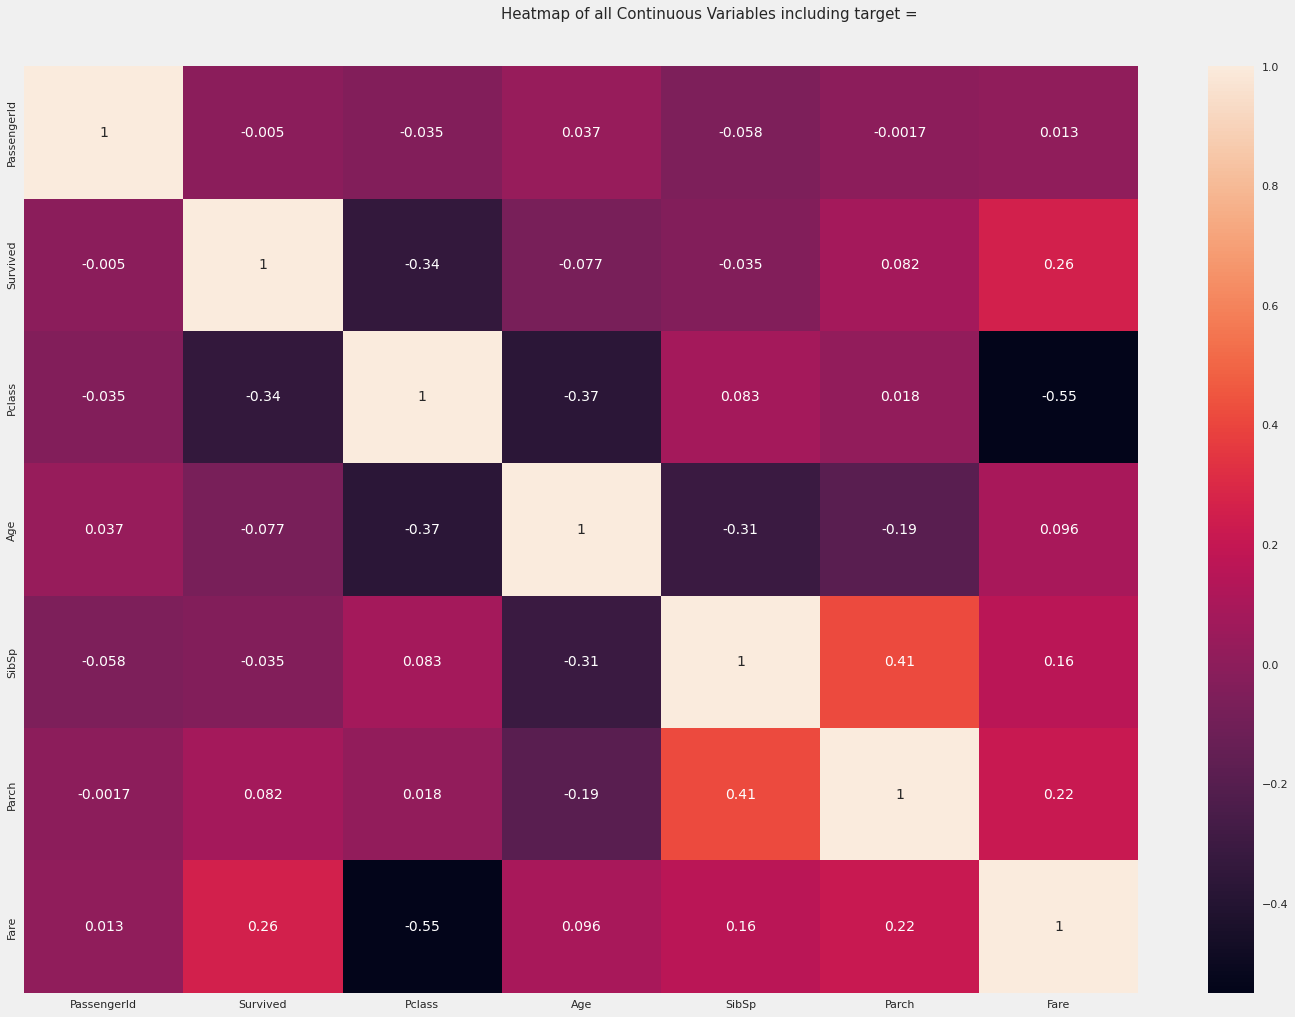

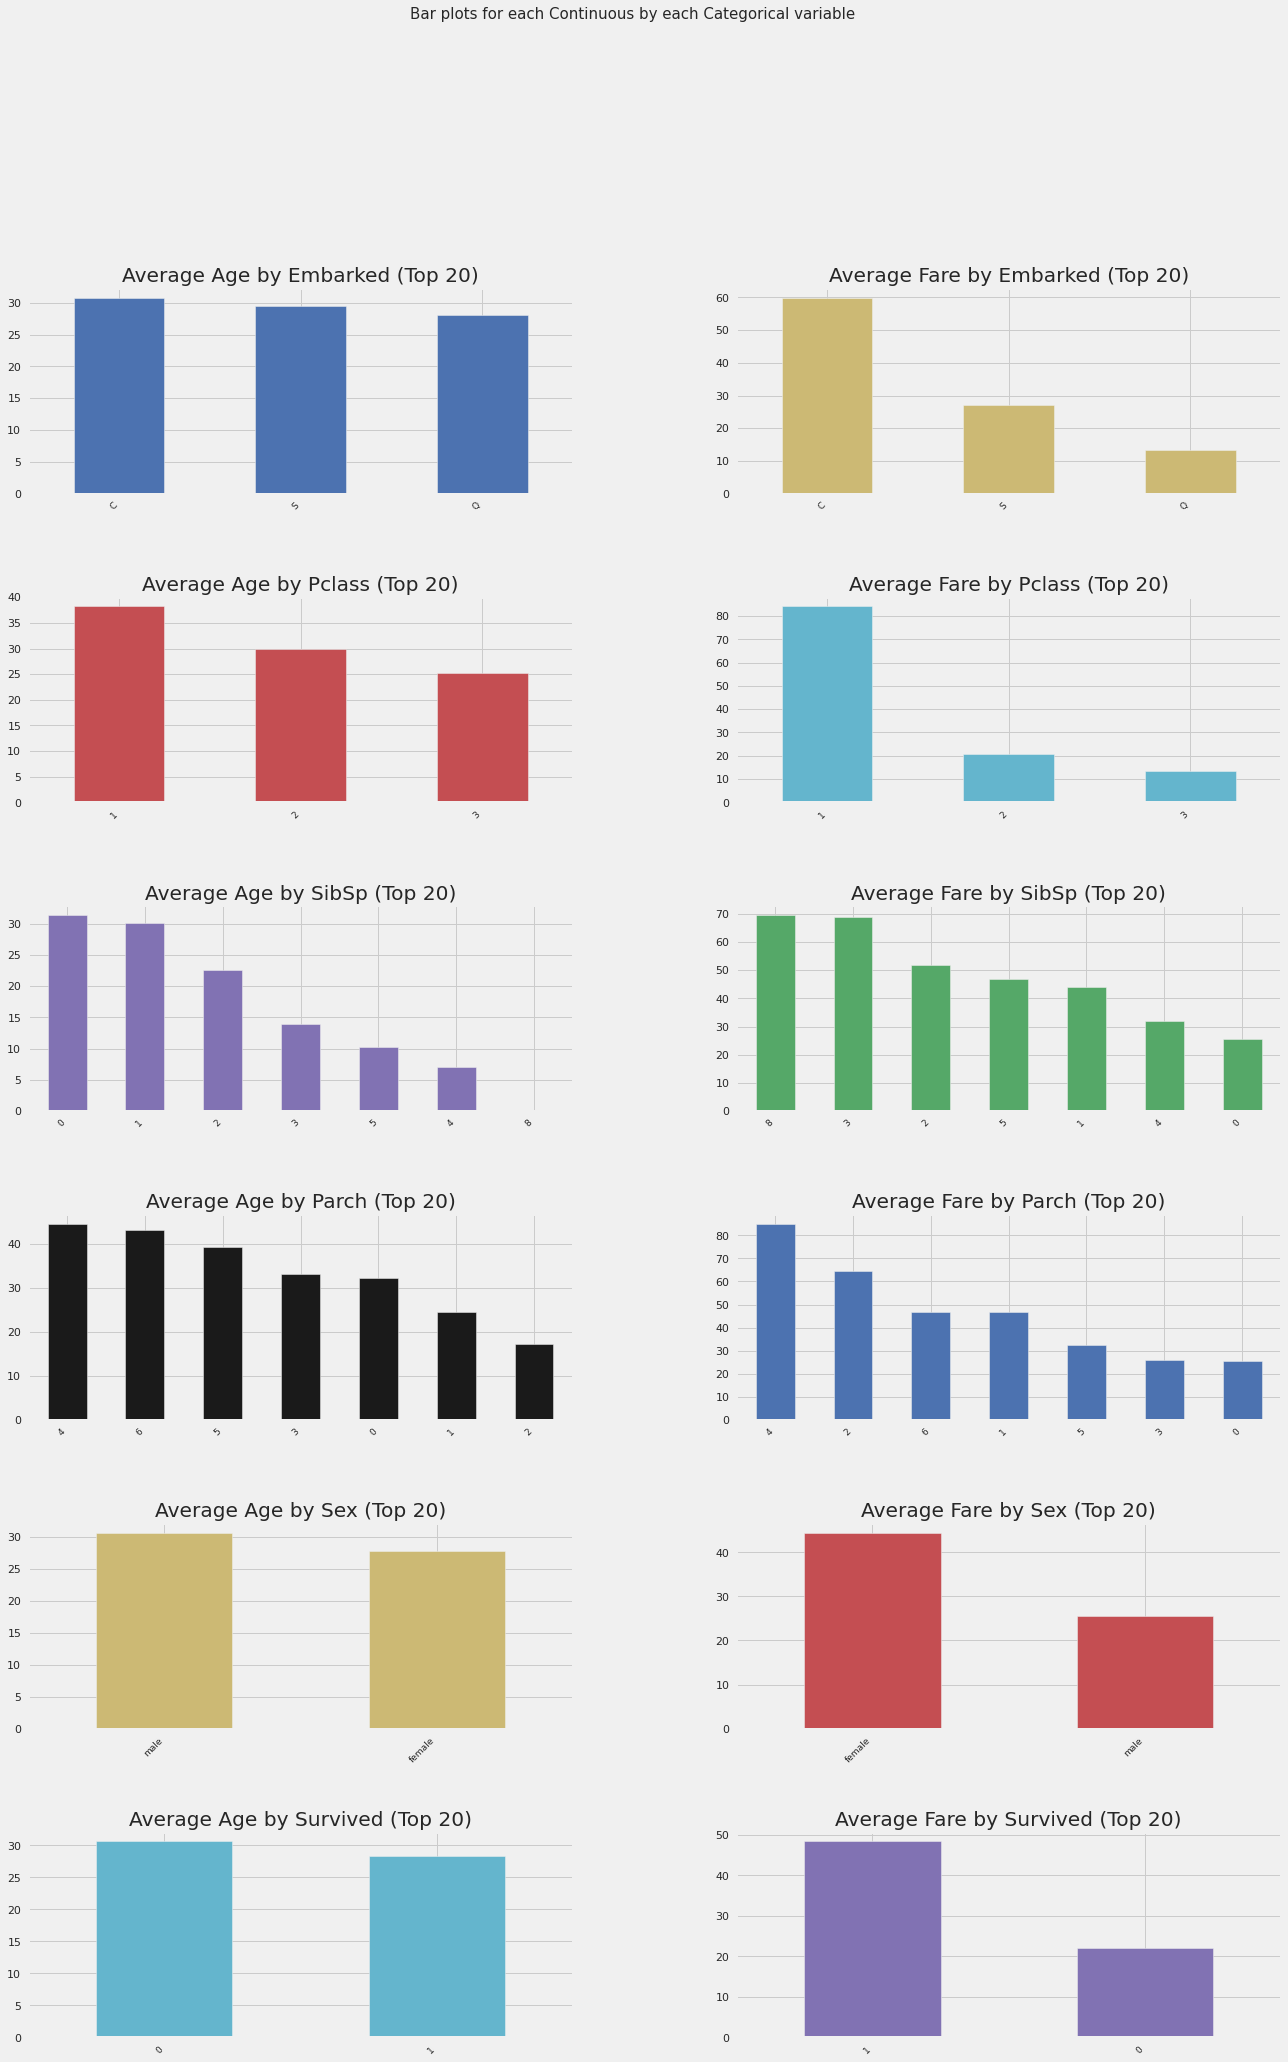

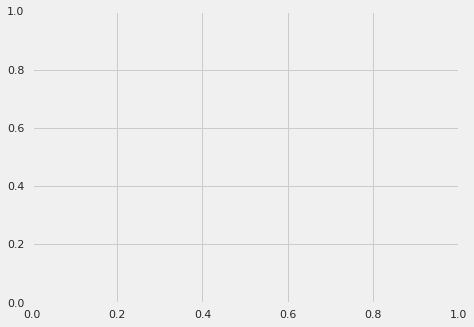

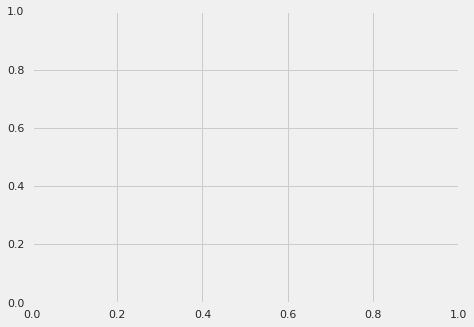

In [39]:
filename='/content/train.csv'
from autoviz.AutoViz_Class import AutoViz_Class
AV=AutoViz_Class()
sep=","
dft=AV.AutoViz(filename,sep=",",dfte=None,header=0,verbose=0,lowess=False,chart_format="svg",max_rows_analyzed=150000,max_cols_analyzed=30)

In [2]:
#load the titanic dataset
titanic=sns.load_dataset('titanic')
#print the first 10 rows of the dataset
titanic.head(10)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


Now here we can see that the PClass and Class is same so one of them can be removed and same for embark and Embark_town

In [3]:
#Count the number of rows and columns in the  dataset
titanic.shape

(891, 15)

So we have around 891 passengers with their discription given in 15 columns

In [4]:
# to get the SDME statistics for the dataset
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#get a count of the number of survived
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

549 passengers did not survive and 342 survived. The data is quite balanced as we can see the 39% of data is shows the survival rate while the 61% did not make it.39:61 shows a pretty balanced data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='survived', ylabel='count'>

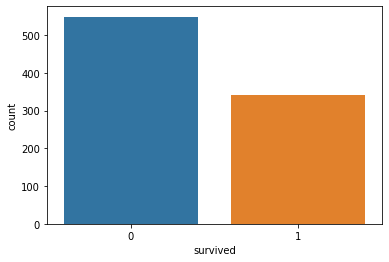

In [6]:
#visualize the counts
sns.countplot(titanic['survived'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

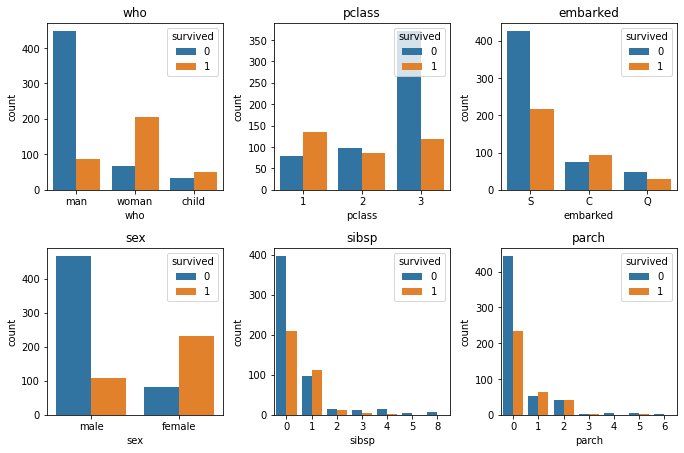

In [7]:
#visualize the count of survivors for columns which are 'who','sex','pclass','parch','embarked'
cols=['who','pclass','embarked','sex','sibsp','parch']
n_rows=2
n_cols=3
#The subplot grid and figure size of each graph
fig,axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*3.2,n_rows*3.2))
for r in range(0,n_rows):
  for c in range(0,n_cols):
    i=r*n_cols+c     #index to go though the number of columns
    ax=axs[r][c]   #show where to position each subplot
    sns.countplot(titanic[cols[i]],hue=titanic['survived'],ax=ax)
    ax.set_title(cols[i])
    ax.legend(title='survived',loc='upper right')
plt.tight_layout()

From above we can say that 
1)Who=Survival rate for the childrens and womens were far greatter than men- so they first saved weakers of the section         
2)PCLASS-The 1st class passengers were mostly saved when compared to the 3rd class passengers- They were discriminating while selecting who will survive
3)EMBARKED- The more people were from the southhampton but there survival rate was lower compared to the passengers from the Cherbourgh
4)SEX= female survival rate was more compared to the male survival rate and hence we can say female were given priority while rescuing 
5)Siblings- big families were less in number compared to the lone travelers and family with one siblings had little effect on survival( though its more)
6)Parch=Parent or child chart shows that if you are lone traveller your chances of survival are very less

In [8]:
#look at survival rate by sex
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


Chances of survival for females are quite high compared to males



In [9]:
#look at survival rate by sex and class
titanic.pivot_table('survived',index='sex',columns='class')


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


First class females had the highest survival chances


<AxesSubplot:xlabel='sex'>

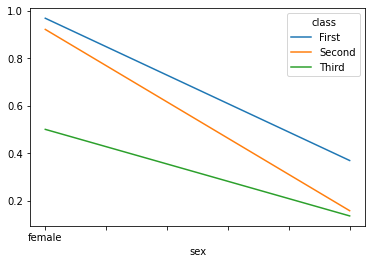

In [10]:
#look at survival rate by sex and class visuallly 
titanic.pivot_table('survived',index='sex',columns='class').plot()

<AxesSubplot:xlabel='class', ylabel='survived'>

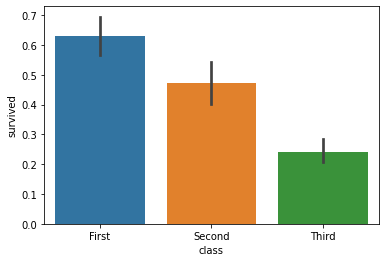

In [11]:
#plot the survivall rate of each class
sns.barplot(x='class',y='survived',data=titanic)

In [12]:
#survival arte by sex ,age and class
age=pd.cut(titanic['age'],[0,18,35,80])
titanic.pivot_table('survived',['sex',age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 35]  0.972222  0.925000  0.500000
       (35, 80]  0.973684  0.850000  0.200000
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 35]  0.500000  0.074074  0.155844
       (35, 80]  0.318182  0.066667  0.062500

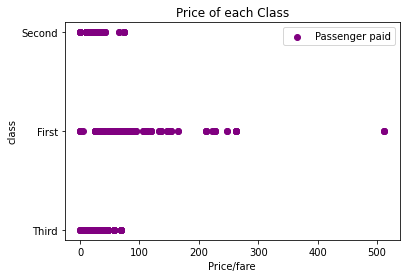

In [13]:
#Plot the prices paid by each class
plt.scatter(titanic['fare'],titanic['class'],color='purple',label='Passenger paid')
plt.ylabel('class')
plt.xlabel('Price/fare')
plt.title('Price of each Class')
plt.legend()
plt.show()

In [14]:
#count the empty values in each columns
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
titanic.isna().mean()

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [16]:
#look at counts
for val in titanic:
  print(titanic[val].value_counts())
  print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [17]:
#drop the repited columns ,deck is removed because it has to mnay missing values and that cant not be replaced so we need to remove it
titanic=titanic.drop(['deck','embark_town','alive','class','who','alone','adult_male'],axis=1)
#remove the rows with missing values
titanic=titanic.dropna(subset=['embarked','age'])

In [18]:
#count new no of rows and columns
titanic.shape

(712, 8)

In [19]:
#look at the data types
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [20]:
#print unique values in the columns
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [21]:
#To deal with the Catogorical variables
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
titanic.iloc[:,7]=labelencoder.fit_transform(titanic.iloc[:,7].values)
titanic.iloc[:,2]=labelencoder.fit_transform(titanic.iloc[:,2].values)


In [22]:
#print unique values in the columns
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [23]:
titanic.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object

In [24]:
#split the data independant X and depndant Y variables
X= titanic.iloc[:,1:8].values
Y= titanic.iloc[:,0].values

In [25]:
#Split the dataset into 80% tarining 20% testing 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [26]:
#scale the data
from sklearn.preprocessing import StandardScaler  
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [27]:
#Create the function with many machine learning models
def models(X_train,Y_train):
  
  #Use Logistic regression
  from sklearn.linear_model import LogisticRegression
  log=LogisticRegression(random_state=0)
  log.fit(X_train,Y_train)

  #use KNeighbors
  from sklearn.neighbors import KNeighborsClassifier
  knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
  knn.fit(X_train,Y_train)

  #use support vector classifier(linear)
  from sklearn.svm import SVC
  scv_lin=SVC(kernel='linear',random_state=0)
  scv_lin.fit(X_train,Y_train)

  #use the (RBF kernel)SVC
  from sklearn.svm import SVC
  svc_rbf=SVC(kernel='rbf',random_state=0)
  svc_rbf.fit(X_train,Y_train)

  #use gaussianNB
  from sklearn.naive_bayes import GaussianNB
  gauss=GaussianNB()
  gauss.fit(X_train,Y_train)

  #use Decision tree
  from sklearn.tree import DecisionTreeClassifier
  tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
  tree.fit(X_train,Y_train)

  #use random forest classifier
  from sklearn.ensemble import RandomForestClassifier
  Forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
  Forest.fit(X_train,Y_train)

  #print traning accuracy for the each model 
  print('[0] Logistic regression Training Accuracy',log.score(X_train,Y_train))
  print('[1] KNeighbors Training Accuracy',knn.score(X_train,Y_train))
  print('[2] SVC linear Training Accuracy',scv_lin.score(X_train,Y_train))
  print('[3] SVC nonLinear_RBF  Training Accuracy',svc_rbf.score(X_train,Y_train))
  print('[4] Gaussian NB  Training Accuracy',gauss.score(X_train,Y_train))
  print('[5] Decision_tree Training Accuracy',tree.score(X_train,Y_train))
  print('[6] Random_forest regression Training Accuracy',Forest.score(X_train,Y_train))

  return log, knn, scv_lin, svc_rbf, gauss,tree,Forest


In [28]:
model=models(X_train,Y_train)

[0] Logistic regression Training Accuracy 0.7978910369068541
[1] KNeighbors Training Accuracy 0.8664323374340949
[2] SVC linear Training Accuracy 0.7768014059753954
[3] SVC nonLinear_RBF  Training Accuracy 0.8506151142355008
[4] Gaussian NB  Training Accuracy 0.8031634446397188
[5] Decision_tree Training Accuracy 0.9929701230228472
[6] Random_forest regression Training Accuracy 0.9753954305799648


Decision_tree Training Accuracy 0.9929701230228472 most accurate

In [29]:
#Show confusion matrix and accuracy for all of the models on the test data
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm=confusion_matrix(Y_test,model[i].predict(X_test))
  #extraxt TN ,FP,FN, TP
  TN ,FP,FN, TP= confusion_matrix(Y_test,model[i].predict(X_test)).ravel()
  test_score=(TP+TN)/(TP+TN+FN+FP)
  print(cm)
  print('Model[{}] testing accuracy = {} '.format(i,test_score))

[[75  7]
 [19 42]]
Model[0] testing accuracy = 0.8181818181818182 
[[67 15]
 [20 41]]
Model[1] testing accuracy = 0.7552447552447552 
[[70 12]
 [18 43]]
Model[2] testing accuracy = 0.7902097902097902 
[[75  7]
 [22 39]]
Model[3] testing accuracy = 0.7972027972027972 
[[69 13]
 [27 34]]
Model[4] testing accuracy = 0.7202797202797203 
[[54 28]
 [12 49]]
Model[5] testing accuracy = 0.7202797202797203 
[[73  9]
 [14 47]]
Model[6] testing accuracy = 0.8391608391608392 


In [30]:
#get the feature importances
forest=model[6]
importances=pd.DataFrame({'feature':titanic.iloc[:,1:8].columns,'importance':np.round(forest.feature_importances_, 3)})
importances=importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


In [31]:
#get the feature importances
Decision_re=model[5]
importances_5=pd.DataFrame({'feature':titanic.iloc[:,1:8].columns,'importance':np.round(Decision_re.feature_importances_, 3)})
importances_5=importances_5.sort_values('importance',ascending=False).set_index('feature')
importances_5

,importance
feature,
age,0.268
fare,0.265
sex,0.216
pclass,0.136
sibsp,0.067
embarked,0.032
parch,0.016


<AxesSubplot:xlabel='feature'>

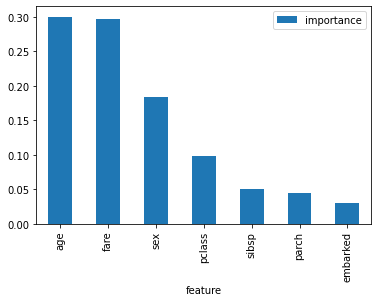

In [32]:
#Visualize the importances
importances.plot.bar()

<AxesSubplot:xlabel='feature'>

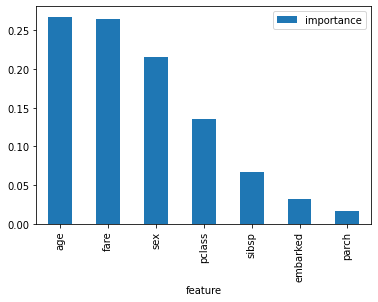

In [33]:
importances_5.plot.bar()

From above both figures we can say that the Age and Fare both are important feature which influence the survival the most followed by the sex 


In [34]:
#print the prediction of the random forest classifier
pred=model[6].predict(X_test)
print(pred)
print()
#print actual values
print(Y_test)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [35]:
my_survival=[[3,1,60,1,0,10.1,1]]
#scaling the prediction
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
my_survival_scaled=sc.fit_transform(my_survival)
#print prrediction of my survival using the random forest classifier
pred=model[6].predict(my_survival_scaled)
print(pred)

if pred==0:
  print("Oh No ! You did not make it.")
else:
  print("Nice! you made it.")

[0]
Oh No ! You did not make it.
